In [2]:
# Single unit retrieval examples

import pdb
import sys
import argparse
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '../../../figures')
import plot_utils as pu
import color_scheme as cs

In [4]:
datapath = "../../article/1/data/data.npy"

data = np.load(datapath, allow_pickle=True)
_, overlaps, _, state, \
_, _, _, _, \
phi_xi = data

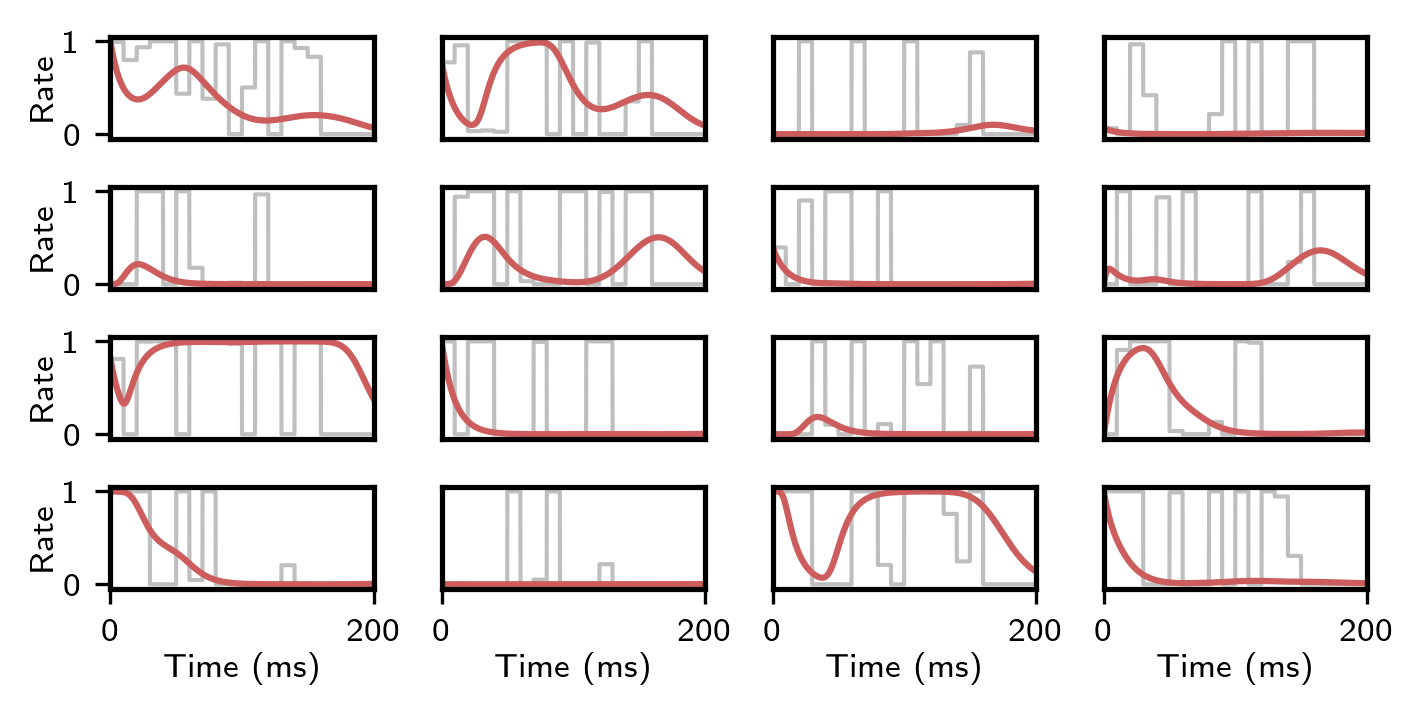

In [18]:
pu.figure_setup()
fig_size = pu.get_fig_size(12, 6)
fig, axes = plt.subplots(4,4,figsize=fig_size, dpi=300)

# Plot random sample
t_max = overlaps[-1,:].argmax()
T = 160
for n_idx, ax in zip(np.random.RandomState(seed=1).choice(40000,16), axes.flatten()):
    ax.plot(
        np.arange(0,T+40,0.1),
        np.r_[np.repeat(phi_xi[0][:,n_idx],100), np.zeros(40*10)],
        color='k',
        alpha=0.25,
        linewidth=1); 
    ax.plot(state[n_idx], color=cs.single_unit_colors()[0])

for ax in axes[:-1,:].flatten():
    ax.set_xticks([])
for ax in axes[:,1:].flatten():
    ax.set_yticks([])
for ax in axes[:,0]:
    ax.set_yticks([0,1])
    ax.set_yticklabels([0,1])
    ax.set_ylabel('Rate', labelpad=1)
for ax in axes.flatten():
    ax.set_xlim([0,200])
    ax.set_xticks([])
for ax in axes[-1,:]:
    ax.set_xlabel('Time (ms)', labelpad=1)
    ax.set_xticks([0,200])
    ax.set_xticklabels([0,200])

plt.tight_layout()
plt.savefig("../output/2.pdf", bbox_inches='tight', dpi=300)